In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import accuracy_score

# K Nearest Neighbors

# 1 - Without nulls

#### Read csv created in Data_preprocessing

In [2]:
treino_0null = pd.read_csv("training_0null.csv")
teste_0null = pd.read_csv("test_0null.csv")

In [3]:
treino_0null_X = treino_0null.drop(columns=['salary']) 
treino_0null_Y = treino_0null['salary']
teste_0null_X = teste_0null.drop(columns=['salary'])  
teste_0null_Y = teste_0null['salary']

#### KNN model

In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
knn = KNeighborsClassifier(n_neighbors=1)

In [6]:
knn.fit(treino_0null_X,treino_0null_Y)

KNeighborsClassifier(n_neighbors=1)

In [7]:
pred = knn.predict(teste_0null_X)

#### Check accuracy

In [8]:
print(classification_report(teste_0null_Y,pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81     11360
           1       0.44      0.46      0.45      3700

    accuracy                           0.72     15060
   macro avg       0.63      0.64      0.63     15060
weighted avg       0.73      0.72      0.72     15060



In [9]:
confusionNotNull = pd.crosstab(teste_0null_Y,pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionNotNull)

Predicted      0     1    All
Actual                       
0           9156  2204  11360
1           1982  1718   3700
All        11138  3922  15060


In [10]:
score = accuracy_score(teste_0null_Y,pred)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.722045


#### Choose K value 

In [11]:
error_rate = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(treino_0null_X,treino_0null_Y)
    pred_i = knn.predict(teste_0null_X)
    error_rate.append(np.mean(pred_i != teste_0null_Y))

Text(0, 0.5, 'Error Rate')

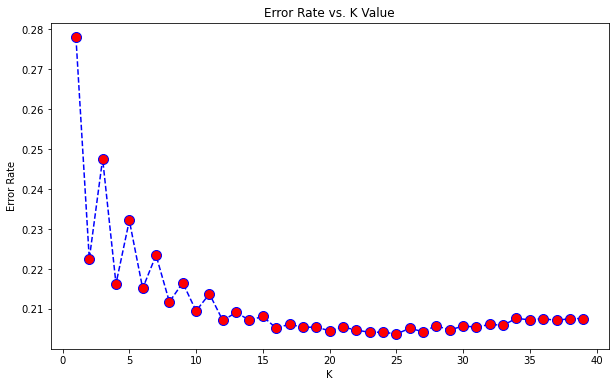

In [12]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Seems like between 23 and 27 we have the best K values

#### New model for the new K value

In [13]:
knn = KNeighborsClassifier(n_neighbors=25)

In [14]:
knn.fit(treino_0null_X,treino_0null_Y)

KNeighborsClassifier(n_neighbors=25)

In [15]:
pred = knn.predict(teste_0null_X)

#### Check accuracy

In [16]:
print(classification_report(teste_0null_Y,pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     11360
           1       0.84      0.21      0.34      3700

    accuracy                           0.80     15060
   macro avg       0.81      0.60      0.61     15060
weighted avg       0.80      0.80      0.75     15060



In [17]:
confusionNotNull = pd.crosstab(teste_0null_Y,pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionNotNull)

Predicted      0    1    All
Actual                      
0          11205  155  11360
1           2913  787   3700
All        14118  942  15060


In [18]:
score = accuracy_score(teste_0null_Y,pred)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.796282


### Undersampling e Oversampling

In [19]:
oversample = RandomOverSampler(sampling_strategy=0.4)
treino_0null_X,treino_0null_Y = oversample.fit_resample(treino_0null_X,treino_0null_Y)

undersample = RandomUnderSampler(sampling_strategy=0.7)
treino_0null_X,treino_0null_Y = undersample.fit_resample(treino_0null_X,treino_0null_Y)

In [20]:
knn = KNeighborsClassifier(n_neighbors=25)

In [21]:
knn.fit(treino_0null_X,treino_0null_Y)

KNeighborsClassifier(n_neighbors=25)

In [22]:
pred = knn.predict(teste_0null_X)

In [23]:
print(classification_report(teste_0null_Y,pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84     11360
           1       0.49      0.32      0.39      3700

    accuracy                           0.75     15060
   macro avg       0.65      0.61      0.62     15060
weighted avg       0.73      0.75      0.73     15060



In [24]:
confusionNotNull = pd.crosstab(teste_0null_Y,pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionNotNull)

Predicted      0     1    All
Actual                       
0          10117  1243  11360
1           2499  1201   3700
All        12616  2444  15060


In [25]:
score = accuracy_score(teste_0null_Y,pred)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.751527


# 2 - Mode as null values

#### Read csv created in Data_preprocessing

In [26]:
treino_mode = pd.read_csv("training_mode.csv")
teste_mode = pd.read_csv("test_mode.csv")

In [27]:
treino_mode_X = treino_mode.drop(columns=['salary']) 
treino_mode_Y = treino_mode['salary']
teste_mode_X = teste_mode.drop(columns=['salary'])  
teste_mode_Y = teste_mode['salary']

#### Choose K value 

In [28]:
error_rate2 = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(treino_mode_X,treino_mode_Y)
    pred_i = knn.predict(teste_mode_X)
    error_rate2.append(np.mean(pred_i != teste_mode_Y))

Text(0, 0.5, 'Error Rate')

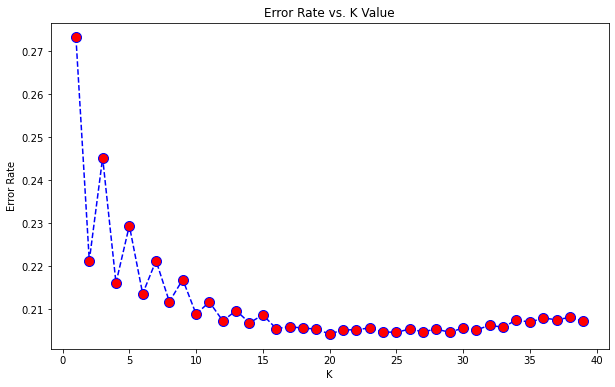

In [29]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate2,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Seems like between 20 and 30 we have the best K values

#### New model for the new K value

In [30]:
knn = KNeighborsClassifier(n_neighbors=20)

In [31]:
knn.fit(treino_mode_X,treino_mode_Y)

KNeighborsClassifier(n_neighbors=20)

In [32]:
pred = knn.predict(teste_mode_X)

#### Check accuracy

In [33]:
print(classification_report(teste_mode_Y,pred))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     11360
           1       0.84      0.21      0.33      3700

    accuracy                           0.80     15060
   macro avg       0.82      0.60      0.61     15060
weighted avg       0.80      0.80      0.75     15060



In [34]:
confusionMode = pd.crosstab(teste_mode_Y,pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionMode)

Predicted      0    1    All
Actual                      
0          11211  149  11360
1           2926  774   3700
All        14137  923  15060


In [35]:
score = accuracy_score(teste_mode_Y,pred)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.795817


### Undersampling e Oversampling

In [36]:
oversample = RandomOverSampler(sampling_strategy=0.4)
treino_mode_X,treino_mode_Y = oversample.fit_resample(treino_mode_X,treino_mode_Y)

undersample = RandomUnderSampler(sampling_strategy=0.7)
treino_mode_X,treino_mode_Y = undersample.fit_resample(treino_mode_X,treino_mode_Y)

In [37]:
knn = KNeighborsClassifier(n_neighbors=20)

In [38]:
knn.fit(treino_mode_X,treino_mode_Y)

KNeighborsClassifier(n_neighbors=20)

In [39]:
pred = knn.predict(teste_mode_X)

In [40]:
print(classification_report(teste_mode_Y,pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.85     11360
           1       0.50      0.33      0.40      3700

    accuracy                           0.76     15060
   macro avg       0.65      0.61      0.62     15060
weighted avg       0.73      0.76      0.74     15060



In [41]:
confusionMode = pd.crosstab(teste_mode_Y,pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionMode)

Predicted      0     1    All
Actual                       
0          10159  1201  11360
1           2480  1220   3700
All        12639  2421  15060


In [42]:
score = accuracy_score(teste_mode_Y,pred)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.755578


# 3 - KNN as null values

#### Read csv created in Data_preprocessing

In [43]:
treino_knn = pd.read_csv("training_knn.csv")
teste_knn = pd.read_csv("test_knn.csv")

In [44]:
treino_knn_X = treino_knn.drop(columns=['salary']) 
treino_knn_Y = treino_knn['salary']
teste_knn_X = teste_knn.drop(columns=['salary'])  
teste_knn_Y = teste_knn['salary']

#### Choose K value 

In [45]:
error_rate3 = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(treino_knn_X,treino_knn_Y)
    pred_i = knn.predict(teste_knn_X)
    error_rate3.append(np.mean(pred_i != teste_knn_Y))

Text(0, 0.5, 'Error Rate')

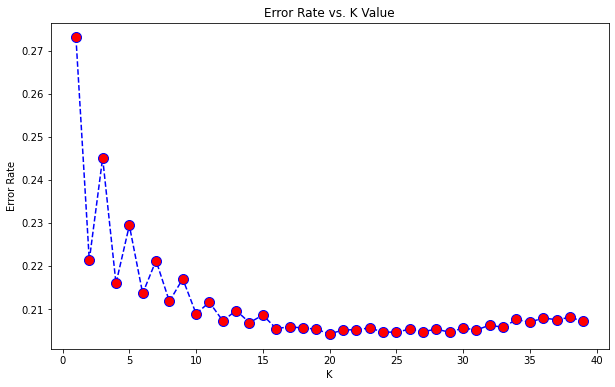

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate3,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Seems like between 20 and 30 we have the best K values

#### New model for the new K value

In [47]:
knn = KNeighborsClassifier(n_neighbors=20)

In [48]:
knn.fit(treino_knn_X,treino_knn_Y)

KNeighborsClassifier(n_neighbors=20)

In [49]:
pred = knn.predict(teste_knn_X)

#### Check accuracy

In [50]:
print(classification_report(teste_knn_Y,pred))

              precision    recall  f1-score   support

         0.0       0.79      0.99      0.88     11360
         1.0       0.84      0.21      0.33      3700

    accuracy                           0.80     15060
   macro avg       0.82      0.60      0.61     15060
weighted avg       0.80      0.80      0.75     15060



In [51]:
confusionKNN = pd.crosstab(teste_knn_Y,pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionKNN)

Predicted    0.0  1.0    All
Actual                      
0.0        11211  149  11360
1.0         2926  774   3700
All        14137  923  15060


In [52]:
score = accuracy_score(teste_knn_Y,pred)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.795817


### Undersampling e Oversampling

In [53]:
oversample = RandomOverSampler(sampling_strategy=0.4)
treino_knn_X,treino_knn_Y = oversample.fit_resample(treino_knn_X,treino_knn_Y)

undersample = RandomUnderSampler(sampling_strategy=0.7)
treino_knn_X,treino_knn_Y = undersample.fit_resample(treino_knn_X,treino_knn_Y)

In [54]:
knn = KNeighborsClassifier(n_neighbors=20)

In [55]:
knn.fit(treino_knn_X,treino_knn_Y)

KNeighborsClassifier(n_neighbors=20)

In [56]:
pred = knn.predict(teste_knn_X)

In [57]:
print(classification_report(teste_knn_Y,pred))

              precision    recall  f1-score   support

         0.0       0.80      0.89      0.84     11360
         1.0       0.49      0.32      0.39      3700

    accuracy                           0.75     15060
   macro avg       0.65      0.61      0.62     15060
weighted avg       0.73      0.75      0.73     15060



In [58]:
confusionKNN = pd.crosstab(teste_knn_Y,pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionKNN)

Predicted    0.0   1.0    All
Actual                       
0.0        10138  1222  11360
1.0         2505  1195   3700
All        12643  2417  15060


In [59]:
score = accuracy_score(teste_knn_Y,pred)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.752523


# 4 - No null but using scale instead of ints

#### Read csv created in Data_preprocessing

In [60]:
treino_strings = pd.read_csv("training_0null_strings.csv")
teste_strings = pd.read_csv("test_0null_strings.csv")

In [61]:
treino_strings_X = treino_strings.drop(columns=['salary']) 
treino_strings_Y = treino_strings['salary']
teste_strings_X = teste_strings.drop(columns=['salary'])  
teste_strings_Y = teste_strings['salary']

#### Scale the data

In [62]:
from sklearn import preprocessing

categorical = ['workclass', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'nativecountry']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        treino_strings_X[feature] = le.fit_transform(treino_strings_X[feature])
        teste_strings_X[feature] = le.transform(teste_strings_X[feature])

In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

treino_strings_X = pd.DataFrame(scaler.fit_transform(treino_strings_X), columns = treino_strings_X.columns)

teste_strings_X = pd.DataFrame(scaler.transform(teste_strings_X), columns = teste_strings_X.columns)

#### Choose K value 

In [64]:
error_rate4 = []

# Will take some time
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(treino_strings_X,treino_strings_Y)
    pred_i = knn.predict(teste_strings_X)
    error_rate4.append(np.mean(pred_i != teste_strings_Y))

Text(0, 0.5, 'Error Rate')

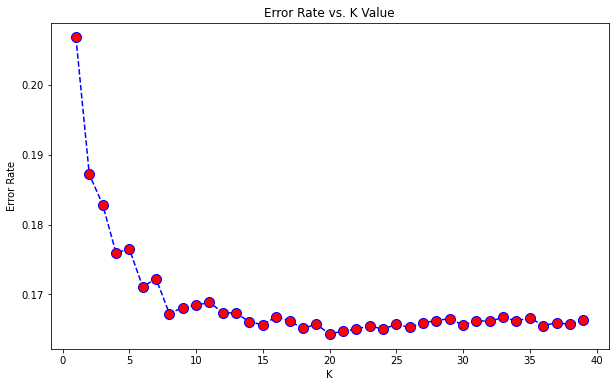

In [65]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate4,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Seems like between 20 and 25 we have the best K values

#### New model for the new K value

In [66]:
knn = KNeighborsClassifier(n_neighbors=20)

In [67]:
knn.fit(treino_strings_X,treino_strings_Y)

KNeighborsClassifier(n_neighbors=20)

In [68]:
pred = knn.predict(teste_strings_X)

#### Check accuracy

In [69]:
print(classification_report(teste_strings_Y,pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89     11360
           1       0.71      0.55      0.62      3700

    accuracy                           0.84     15060
   macro avg       0.79      0.74      0.76     15060
weighted avg       0.83      0.84      0.83     15060



In [70]:
confusionScale = pd.crosstab(teste_strings_Y,pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionScale)

Predicted      0     1    All
Actual                       
0          10542   818  11360
1           1657  2043   3700
All        12199  2861  15060


In [71]:
score = accuracy_score(teste_strings_Y,pred)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.835657


### Undersampling e Oversampling

In [72]:
oversample = RandomOverSampler(sampling_strategy=0.4)
treino_strings_X,treino_strings_Y = oversample.fit_resample(treino_strings_X,treino_strings_Y)

undersample = RandomUnderSampler(sampling_strategy=0.7)
treino_strings_X,treino_strings_Y = undersample.fit_resample(treino_strings_X,treino_strings_Y)

In [73]:
knn = KNeighborsClassifier(n_neighbors=10)

In [74]:
knn.fit(treino_strings_X,treino_strings_Y)

KNeighborsClassifier(n_neighbors=10)

In [75]:
pred = knn.predict(teste_strings_X)

In [76]:
print(classification_report(teste_strings_Y,pred))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87     11360
           1       0.61      0.71      0.66      3700

    accuracy                           0.82     15060
   macro avg       0.75      0.78      0.77     15060
weighted avg       0.83      0.82      0.82     15060



In [77]:
confusionScale = pd.crosstab(teste_strings_Y,pred, rownames=['Actual'], colnames=['Predicted'], margins=True)
print(confusionScale)

Predicted      0     1    All
Actual                       
0           9656  1704  11360
1           1062  2638   3700
All        10718  4342  15060


In [78]:
score = accuracy_score(teste_strings_Y,pred)
print('Accuracy:{0:f}'.format(score))

Accuracy:0.816335
